# Data exploration

The data for this task was collected using an Android application that can read and store data from accelerometer sensor. The data was collected in multiple public transport vehicles, including buses, trains and trams.

Each stop of the vehicle was manually annotated.

In [7]:
import os
import sys
import boto3
from zipfile import ZipFile
import pandas as pd
import numpy as np
import json
import pickle
import io
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append("../tmd-primer")
from tmdprimer.stop_classification.data_loaders.s3_loader import DVDTS3DataLoader
from tmdprimer.stop_classification.datasets.dvdt_dataset import DVDTDataset
bucket = os.environ['BUCKET_NAME']
path = 'accelerometer_data'
s3client = boto3.client('s3')

In [8]:
dataset = DVDTS3DataLoader().load_dataset(bucket, path)

loading accelerometer_data/s bahn zh_train_2021-02-03T16_37_29.808Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-02-04T07_09_16.224Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-02-09T07_41_27.652Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-02-11T06_42_19.713Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-02-16T07_04_22.005Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-02-16T15_52_56.382Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-02-16T16_16_04.586Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-02-18T10_41_40.210Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-02-26T07_25_38.686Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-03-23T07_17_50.583Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-03-25T06_57_04.249Z_high.zip
loading accelerometer_data/s bahn zh_train_2021-03-25T07_17_41.358Z_high.zip
loading accelerometer_data/tram 10 zh_tram_2021-02-03T16_11_35.097Z_high.zip

## Stop and mode durations

In [5]:
# bug in pandas agg-mean -- does not support timedelta for some reason
stop_durations_df = dataset.stop_durations_df
stop_durations_df.groupby('mode').agg(['min', "max", pd.Series.mean])

duration                                
                       min             max            mean
mode                                                      
stop_train 00:00:16.151000 00:00:32.832000 00:00:24.941818
stop_tram  00:00:03.128000 00:01:19.437000 00:00:22.667428
train      00:01:12.359000 00:02:00.592000 00:01:31.218692
tram       00:00:19.359000 00:01:59.036000 00:01:04.148065

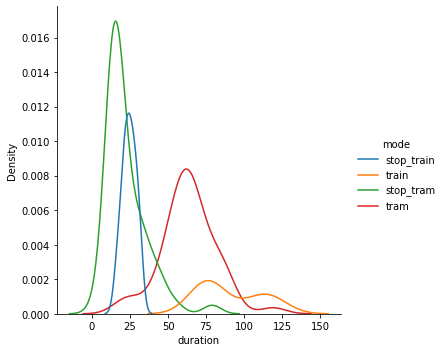

In [4]:
import seaborn as sns
stop_durations_df["duration"] = stop_durations_df["duration"].astype("timedelta64[s]")
sns.displot(stop_durations_df, x="duration", hue="mode", kind="kde")

## Distribution of acceleration values

<AxesSubplot:>

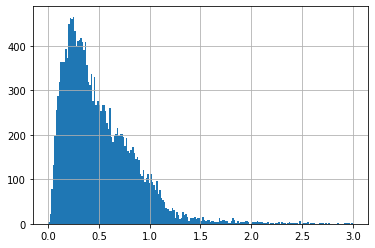

In [13]:
dataset.data_files[-5].df['linear_accel'].hist(bins=200, range=(0, 3))

<AxesSubplot:>

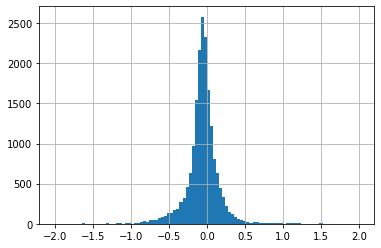

In [20]:
dataset.data_files[-5].df['x'].hist(bins=100, range=(-2, 2))

## Visualize single sample

In [79]:
dataset.data_files[17].get_figure()

alt.LayerChart(...)